In [1]:
# Data_sets:
# https://pjreddie.com/media/files/mnist_train.csv
# https://pjreddie.com/media/files/mnist_test.csv

In [2]:
# import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
mnist_train = pd.read_csv("./data_sets/mnist_train.csv", header=None)
mnist_test = pd.read_csv("./data_sets/mnist_test.csv", header=None)

In [4]:
mnist_train.shape

(60000, 785)

In [5]:
mnist_test.shape

(10000, 785)

In [6]:
mnist_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = ["label"]
for i in range(784):
    cols.append(f"px_{i + 1}")

In [8]:
print(cols)

['label', 'px_1', 'px_2', 'px_3', 'px_4', 'px_5', 'px_6', 'px_7', 'px_8', 'px_9', 'px_10', 'px_11', 'px_12', 'px_13', 'px_14', 'px_15', 'px_16', 'px_17', 'px_18', 'px_19', 'px_20', 'px_21', 'px_22', 'px_23', 'px_24', 'px_25', 'px_26', 'px_27', 'px_28', 'px_29', 'px_30', 'px_31', 'px_32', 'px_33', 'px_34', 'px_35', 'px_36', 'px_37', 'px_38', 'px_39', 'px_40', 'px_41', 'px_42', 'px_43', 'px_44', 'px_45', 'px_46', 'px_47', 'px_48', 'px_49', 'px_50', 'px_51', 'px_52', 'px_53', 'px_54', 'px_55', 'px_56', 'px_57', 'px_58', 'px_59', 'px_60', 'px_61', 'px_62', 'px_63', 'px_64', 'px_65', 'px_66', 'px_67', 'px_68', 'px_69', 'px_70', 'px_71', 'px_72', 'px_73', 'px_74', 'px_75', 'px_76', 'px_77', 'px_78', 'px_79', 'px_80', 'px_81', 'px_82', 'px_83', 'px_84', 'px_85', 'px_86', 'px_87', 'px_88', 'px_89', 'px_90', 'px_91', 'px_92', 'px_93', 'px_94', 'px_95', 'px_96', 'px_97', 'px_98', 'px_99', 'px_100', 'px_101', 'px_102', 'px_103', 'px_104', 'px_105', 'px_106', 'px_107', 'px_108', 'px_109', 'px_110'

In [9]:
mnist_train.columns = cols
mnist_test.columns = cols

In [10]:
mnist_train.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
image_row = mnist_train.values[10, 1:]

In [12]:
image_row.shape

(784,)

In [13]:
image = image_row.reshape(28, 28)

In [14]:
image.shape

(28, 28)

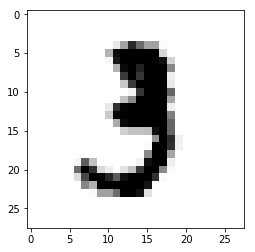

In [15]:
plt.imshow(image, cmap="Greys")

In [16]:
# Nearest neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
train_data = mnist_train.values[:, 1:]
test_data = mnist_test.values[:, 1:]

In [19]:
train_label = mnist_train.values[:, 0]
test_label = mnist_test.values[:, 0]

In [20]:
print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [21]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


In [22]:
kn_classifier = KNeighborsClassifier(n_jobs=-1)

In [23]:
kn_classifier = kn_classifier.fit(train_data, train_label)

На рисунке представлена цифра 6:


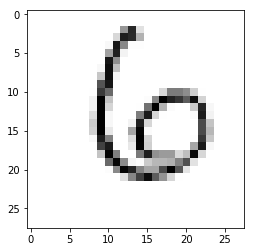

In [24]:
test_id = 100
plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greys")
print(f"На рисунке представлена цифра {test_label[test_id]}:")

In [25]:
kn_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([6], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
kn_predictions = kn_classifier.predict(test_data)

In [28]:
kn_accuracy = accuracy_score(test_label, kn_predictions)
print(f"Accuracy percent: {kn_accuracy * 100:.2f}%")

Accuracy percent: 96.88%


In [29]:
# Neural network

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp_classifier = MLPClassifier(verbose=True, n_iter_no_change=30, hidden_layer_sizes=(200,))

In [32]:
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 1.98479739
Iteration 2, loss = 0.77762129
Iteration 3, loss = 0.47453860
Iteration 4, loss = 0.33355603
Iteration 5, loss = 0.23379547
Iteration 6, loss = 0.19154466
Iteration 7, loss = 0.14943881
Iteration 8, loss = 0.14099369
Iteration 9, loss = 0.13651050
Iteration 10, loss = 0.13770977
Iteration 11, loss = 0.12867459
Iteration 12, loss = 0.12490781
Iteration 13, loss = 0.12792997
Iteration 14, loss = 0.10275575
Iteration 15, loss = 0.09927886
Iteration 16, loss = 0.11408883
Iteration 17, loss = 0.11824554
Iteration 18, loss = 0.10222565
Iteration 19, loss = 0.09714878
Iteration 20, loss = 0.08684315
Iteration 21, loss = 0.09438737
Iteration 22, loss = 0.07439532
Iteration 23, loss = 0.10883305
Iteration 24, loss = 0.11437237
Iteration 25, loss = 0.09336390
Iteration 26, loss = 0.07527308
Iteration 27, loss = 0.07760644
Iteration 28, loss = 0.09514355
Iteration 29, loss = 0.08680963
Iteration 30, loss = 0.08264559
Iteration 31, loss = 0.07766161
Iteration 32, los

На рисунке представлена цифра 9:


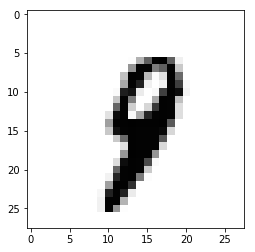

In [33]:
test_id = 874
plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greys")
print(f"На рисунке представлена цифра {test_label[test_id]}:")

In [34]:
mlp_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([9], dtype=int64)

In [35]:
mlp_predictions = mlp_classifier.predict(test_data)

In [36]:
mlp_accuracy = accuracy_score(test_label, mlp_predictions)
print(f"Accuracy percent: {mlp_accuracy * 100:.2f}%")

Accuracy percent: 97.65%
